# MPPT Statique


## Preprocessing


!pip3 install openpyxl
!pip3 install pandas

In [6]:
vitesse_vent = data20["Vitesse du vent (m/s)"].mean()
print(vitesse_vent)

20.677571284768213


In [27]:
import pandas as pd
import numpy as np



# Supposons que les colonnes s'appellent "RPM" et "Vitesse du vent"
rpm = data20["Régime Rotor (rpm)"]
vitesse_vent = data20["Vitesse du vent (m/s)"]

# Définir le rayon du rotor (exemple : 10 mètres)
R = 0,2  # Remplacer par la valeur réelle du rayon du rotor

# Calculer la vitesse angulaire (omega) en rad/s
omega = (rpm * 2 * np.pi) / 60

# Calculer le TSR
tsr =  omega * 0.2/ vitesse_vent


# Ajouter le TSR aux données pour un éventuel export ou analyse
data20["TSR"] = tsr

# Afficher les premières lignes du TSR pour vérifier
print(data20[["Régime Rotor (rpm)", "Vitesse du vent (m/s)", "TSR"]])


     Régime Rotor (rpm)  Vitesse du vent (m/s)       TSR
0            599.608024              20.726372  0.605903
1            601.068134              20.685189  0.608587
2            602.481065              20.919666  0.603180
3            600.126555              20.550575  0.611614
4            601.739315              20.812483  0.605540
..                  ...                    ...       ...
146          601.429598              20.562332  0.612592
147          601.148819              20.717115  0.607731
148          599.730253              20.513275  0.612322
149          601.017270              20.627750  0.610230
150          601.978390              20.675693  0.609789

[151 rows x 3 columns]


In [2]:
import pandas as pd

data20 = pd.read_excel("données.xlsx", sheet_name=1) 
data30 = pd.read_excel("données.xlsx", sheet_name=2) 
data40 = pd.read_excel("données.xlsx", sheet_name=3) 
data50 = pd.read_excel("données.xlsx", sheet_name=4) 



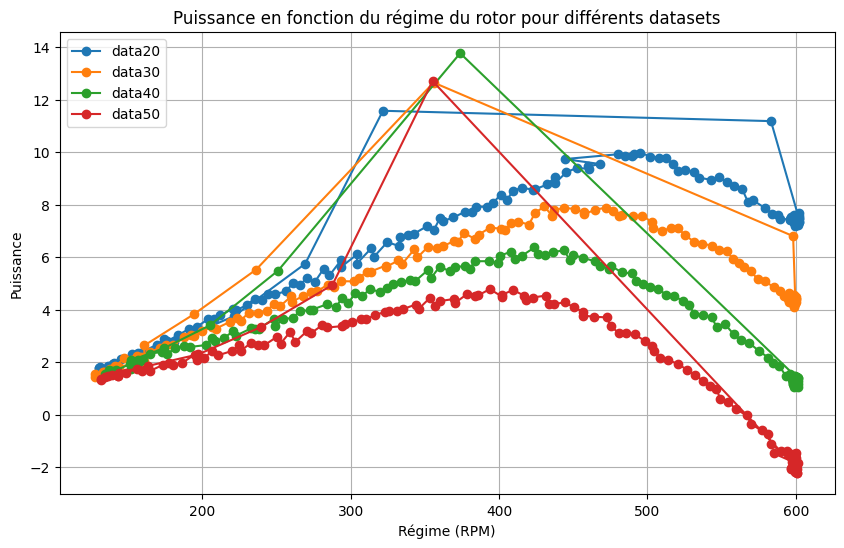

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que les fichiers sont déjà chargés en tant que data20, data30, data40 et data50
# et que chaque DataFrame contient les colonnes "Puissance Moteur (W)" et "Régime Rotor (rpm)"

# Liste des DataFrames et des étiquettes pour les légendes
datasets = {
    "data20": data20,
    "data30": data30,
    "data40": data40,
    "data50": data50
}

# Création de la figure
plt.figure(figsize=(10, 6))

# Boucle pour tracer chaque ensemble de données
for label, data in datasets.items():
    puissance = data["Puissance Moteur (W)"]   # Colonne de puissance
    rpm = data["Régime Rotor (rpm)"]           # Colonne de régime (en RPM)
    plt.plot(rpm, puissance, marker='o', linestyle='-', label=label)  # Ajout de chaque série

# Personnalisation du graphique
plt.xlabel("Régime (RPM)")
plt.ylabel("Puissance")
plt.title("Puissance en fonction du régime du rotor pour différents datasets")
plt.legend()   # Affiche la légende pour différencier chaque courbe
plt.grid(True)
plt.show()


## Lissage des courbes


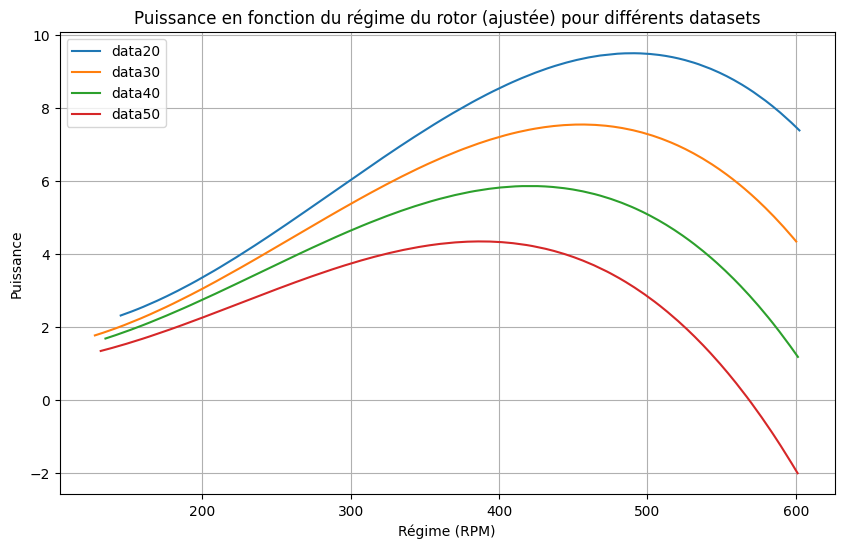

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des DataFrames et des étiquettes pour les légendes
datasets = {
    "data20": data20,
    "data30": data30,
    "data40": data40,
    "data50": data50
}

# Création de la figure
plt.figure(figsize=(10, 6))

# Boucle pour traiter chaque ensemble de données
for label, data in datasets.items():
    puissance = data["Puissance Moteur (W)"]   # Colonne de puissance
    rpm = data["Régime Rotor (rpm)"]           # Colonne de régime (en RPM)

    # Détection des valeurs aberrantes en utilisant l'écart interquartile (IQR)
    Q1 = puissance.quantile(0.25)
    Q3 = puissance.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les valeurs aberrantes
    mask = (puissance >= lower_bound) & (puissance <= upper_bound)
    puissance_filtrée = puissance[mask]
    rpm_filtré = rpm[mask]

    # Tri des valeurs de puissance et de régime pour éviter la branche en dessous
    sorted_indices = rpm_filtré.argsort()
    rpm_filtré = rpm_filtré.iloc[sorted_indices]
    puissance_filtrée = puissance_filtrée.iloc[sorted_indices]

    # Ajustement d'un polynôme de degré 3
    coefficients = np.polyfit(rpm_filtré, puissance_filtrée, 3)
    polynome = np.poly1d(coefficients)
    
    # Générer les valeurs lissées pour la courbe en utilisant le polynôme
    puissance_lissée = polynome(rpm_filtré)

    # Tracer la courbe lissée
    plt.plot(rpm_filtré, puissance_lissée, linestyle='-', label=label)

# Personnalisation du graphique
plt.xlabel("Régime (RPM)")
plt.ylabel("Puissance")
plt.title("Puissance en fonction du régime du rotor (ajustée) pour différents datasets")
plt.legend()   # Affiche la légende pour différencier chaque courbe
plt.grid(True)
plt.show()


## †rouver le Max

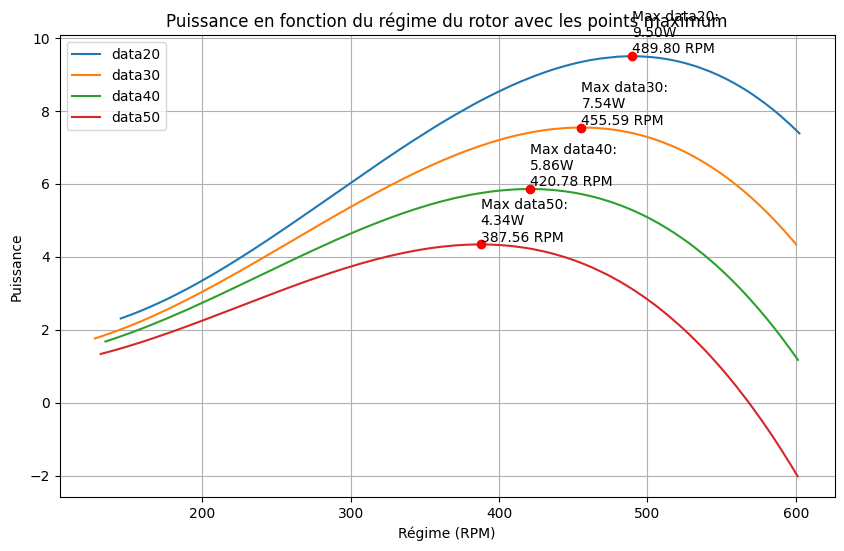

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des DataFrames et des étiquettes pour les légendes
datasets = {
    "data20": data20,
    "data30": data30,
    "data40": data40,
    "data50": data50
}

# Création de la figure
plt.figure(figsize=(10, 6))

# Boucle pour traiter chaque ensemble de données et trouver le maximum
for label, data in datasets.items():
    puissance = data["Puissance Moteur (W)"]
    rpm = data["Régime Rotor (rpm)"]

    # Détection des valeurs aberrantes en utilisant l'écart interquartile (IQR)
    Q1 = puissance.quantile(0.25)
    Q3 = puissance.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les valeurs aberrantes
    mask = (puissance >= lower_bound) & (puissance <= upper_bound)
    puissance_filtrée = puissance[mask]
    rpm_filtré = rpm[mask]

    # Tri des valeurs pour éviter la branche en dessous
    sorted_indices = rpm_filtré.argsort()
    rpm_filtré = rpm_filtré.iloc[sorted_indices]
    puissance_filtrée = puissance_filtrée.iloc[sorted_indices]

    # Ajustement d'un polynôme de degré 3
    coefficients = np.polyfit(rpm_filtré, puissance_filtrée, 3)
    polynome = np.poly1d(coefficients)
    
    # Calcul de la dérivée du polynôme
    polynome_derivé = polynome.deriv()
    
    # Trouver les racines de la dérivée (points critiques)
    racines = polynome_derivé.r
    # Filtrer les racines pour obtenir celles qui sont dans le domaine des données
    racines = [r for r in racines if rpm_filtré.min() <= r <= rpm_filtré.max()]
    
    # Trouver le maximum en vérifiant les valeurs du polynôme aux racines
    max_rpm = None
    max_puissance = -np.inf
    for racine in racines:
        puissance_critique = polynome(racine)
        if puissance_critique > max_puissance:
            max_puissance = puissance_critique
            max_rpm = racine
    
    # Afficher le maximum trouvé sur le graphique
    plt.plot(rpm_filtré, polynome(rpm_filtré), linestyle='-', label=label)
    if max_rpm is not None:
        plt.plot(max_rpm, max_puissance, 'ro')  # Marquer le point maximum en rouge
        plt.text(max_rpm, max_puissance,
                 f'Max {label}:\n{max_puissance:.2f}W\n{max_rpm:.2f} RPM',
                 ha='left', va='bottom')

# Personnalisation du graphique
plt.xlabel("Régime (RPM)")
plt.ylabel("Puissance")
plt.title("Puissance en fonction du régime du rotor avec les points maximum")
plt.legend()   # Affiche la légende pour différencier chaque courbe
plt.grid(True)
plt.show()


In [14]:
file_path = '10m_s.txt'

data10 = pd.read_csv(
    file_path, 
    sep='\s+',                   # Permet de capturer les espaces multiples
    header=None,                 # Pas d'en-tête dans le fichier
    names=column_names,          # Attribution des noms de colonnes
    encoding='ISO-8859-1',       # Encodage
    decimal=',',                 # Utilisation de la virgule comme séparateur décimal
    on_bad_lines='skip'          # Ignore les lignes mal formatées
)
data10



Date     Heure    CourantMoteur(A)    TensionMoteur(V)  \
0          Date   \tHeure  \tCourantMoteur(A)  \tTensionMoteur(V)   
1    25/10/2024  09:11:22           -0,002182           24,001264   
2    25/10/2024  09:11:23           -0,001921           24,000040   
3    25/10/2024  09:11:23           -0,002283           24,000744   
4    25/10/2024  09:11:23           -0,002272           24,000326   
..          ...       ...                 ...                 ...   
933  25/10/2024  09:26:37           -0,471882           23,972527   
934  25/10/2024  09:26:37           -0,469566           23,973995   
935  25/10/2024  09:26:37           -0,477354           23,974248   
936  25/10/2024  09:26:37           -0,476782           23,974607   
937  25/10/2024  09:26:37           -0,473047           23,975444   

       Vitesseduvent(m/s)    CourantAlimentation(A)    PuissanceMoteur(W)  \
0    \tVitesseduvent(m/s)  \tCourantAlimentation(A)  \tPuissanceMoteur(W)   
1                0,016502                  0,378441             -0,052361   
2                0,021976                  0,378175             -0,046095   
3                0,015930                  0,378250             -0,054805   
4                0,012712                  0,378344             -0,054522   
..                    ...                       ...                   ...   
933             10,257905                  0,630503            -11,312197   
934             10,399163                  0,627256            -11,257381   
935             10,370485                  0,628282            -11,444200   
936             10,296341                  0,627757            -11,430663   
937             10,120223                  0,621078            -11,341509   

       RÈgimeRotor(rpm)    CoupleMoteur(mNm)    CoupleRotor(mNm)  \
0    \tRégimeRotor(rpm)  \tCoupleMoteur(mNm)  \tCoupleRotor(mNm)   
1              0,000000                 -Inf                -Inf   
2              0,000000                 -Inf                -Inf   
3              0,000000                 -Inf                -Inf   
4              0,000000                 -Inf                -Inf   
..                  ...                  ...                 ...   
933          597,547938           -27,392624         -180,791316   
934          599,566501           -27,168111         -179,309533   
935          599,220701           -27,634911         -182,390410   
936          597,674437           -27,673632         -182,645974   
937          598,546060           -27,417806         -180,957522   

       ConsigneYaw(∞)    ConsignePitch(∞)  
0    \tConsigneYaw(°)  \tConsignePitch(°)  
1            4,000000           45,000000  
2            4,000000           45,000000  
3            4,000000           45,000000  
4            4,000000           45,000000  
..                ...                 ...  
933          4,000000           45,000000  
934          4,000000           45,000000  
935          4,000000           45,000000  
936          4,000000           45,000000  
937          4,000000           45,000000  

[938 rows x 12 columns]

In [13]:
data10.columns


Index(['Date', 'Heure', 'CourantMoteur(A)', 'TensionMoteur(V)',
       'Vitesseduvent(m/s)', 'CourantAlimentation(A)', 'PuissanceMoteur(W)',
       'RÈgimeRotor(rpm)', 'CoupleMoteur(mNm)', 'CoupleRotor(mNm)',
       'ConsigneYaw(∞)', 'ConsignePitch(∞)'],
      dtype='object')

In [44]:
# Garder seulement les colonnes 5 et 7 (index 4 et 6)
data10 = data10.iloc[:, [4, 6]]

# Vérifier le résultat
print(data10.head())


                      4                    6
0  \tPuissanceMoteur(W)  \tCoupleMoteur(mNm)


In [46]:
data10.shape

(1, 9)

In [2]:
# Liste pour stocker chaque DataFrame
data_list = []

# Noms de colonnes à attribuer
column_names = ["Date", "Heure", "CourantMoteur(A)", "TensionMoteur(V)", "Vitesseduvent(m/s)", 
                "CourantAlimentation(A)", "PuissanceMoteur(W)", "RégimeRotor(rpm)", 
                "CoupleMoteur(mNm)", "CoupleRotor(mNm)", "ConsigneYaw(°)", "ConsignePitch(°)"]

# Boucle pour charger chaque fichier dans un DataFrame et l'ajouter à la liste
for i in range(10, 14):  # Boucle de 10 à 13 inclus
    file_path = f'{i}m_s.txt'  # Nom dynamique pour chaque fichier
    
    # Chargement du fichier
    data = pd.read_csv(
        file_path, 
        sep='\s+',                   # Séparateur pour capturer les espaces multiples
        header=None,                 # Pas d'en-tête dans le fichier
        names=column_names,          # Noms des colonnes
        encoding='ISO-8859-1',       # Encodage ISO-8859-1
        decimal=',',                 # Utilisation de la virgule comme séparateur décimal
        on_bad_lines='skip'          # Ignore les lignes mal formatées
    )
    
    # Ajout du DataFrame à la liste
    data_list.append(data)

# Affiche le premier DataFrame comme exemple
data_list[1]


Date     Heure    CourantMoteur(A)    TensionMoteur(V)  \
0          Date   \tHeure  \tCourantMoteur(A)  \tTensionMoteur(V)   
1    25/10/2024  09:53:05           -0,002824           23,998907   
2    25/10/2024  09:53:05           -0,002163           23,999334   
3    25/10/2024  09:53:05           -0,002657           23,999959   
4    25/10/2024  09:53:05           -0,002455           24,000036   
..          ...       ...                 ...                 ...   
124  25/10/2024  09:53:17           -0,381347           23,959443   
125  25/10/2024  09:53:17           -0,395858           23,965308   
126  25/10/2024  09:53:17           -0,386775           23,965909   
127  25/10/2024  09:53:18           -0,387137           23,967420   
128  25/10/2024  09:53:18           -0,388716           23,967579   

       Vitesseduvent(m/s)    CourantAlimentation(A)    PuissanceMoteur(W)  \
0    \tVitesseduvent(m/s)  \tCourantAlimentation(A)  \tPuissanceMoteur(W)   
1               11,312394                  0,379885             -0,067774   
2               11,322925                  0,378939             -0,051910   
3               11,276682                  0,379820             -0,063768   
4               11,194918                  0,379628             -0,058918   
..                    ...                       ...                   ...   
124             11,364433                  0,620849             -9,136869   
125             11,250257                  0,629965             -9,486869   
126             11,381217                  0,621294             -9,269417   
127             11,370842                  0,616542             -9,278685   
128             11,265142                  0,614566             -9,316590   

       RégimeRotor(rpm)    CoupleMoteur(mNm)    CoupleRotor(mNm)  \
0    \tRégimeRotor(rpm)  \tCoupleMoteur(mNm)  \tCoupleRotor(mNm)   
1              0,000000                 -Inf                -Inf   
2              0,000000                 -Inf                -Inf   
3              0,000000                 -Inf                -Inf   
4              0,000000                 -Inf                -Inf   
..                  ...                  ...                 ...   
124          597,942540           -22,110439         -145,928898   
125          597,973611           -22,956216         -151,511028   
126          598,607149           -22,406291         -147,881521   
127          598,840979           -22,419935         -147,971571   
128          599,795937           -22,475684         -148,339515   

       ConsigneYaw(°)    ConsignePitch(°)  
0    \tConsigneYaw(°)  \tConsignePitch(°)  
1            4,000000           45,000000  
2            4,000000           45,000000  
3            4,000000           45,000000  
4            4,000000           45,000000  
..                ...                 ...  
124          4,000000           45,000000  
125          4,000000           45,000000  
126          4,000000           45,000000  
127          4,000000           45,000000  
128          4,000000           45,000000  

[129 rows x 12 columns]

In [3]:
# Remplacer les virgules par des points et convertir la colonne en type numérique
for data in data_list:
    data['PuissanceMoteur(W)'] = data['PuissanceMoteur(W)'].str.replace(',', '.', regex=False)
    data['RégimeRotor(rpm)'] = data['RégimeRotor(rpm)'].str.replace(',', '.', regex=False) 

# Vérifier que le remplacement a été effectué et la conversion réussie
data_list[2]['RégimeRotor(rpm)']


0      \tRégimeRotor(rpm)
1               20.107575
2               20.107575
3               20.107575
4               20.107575
              ...        
121            598.764067
122            600.514653
123            598.353809
124            599.224256
125            599.896074
Name: RégimeRotor(rpm), Length: 126, dtype: object

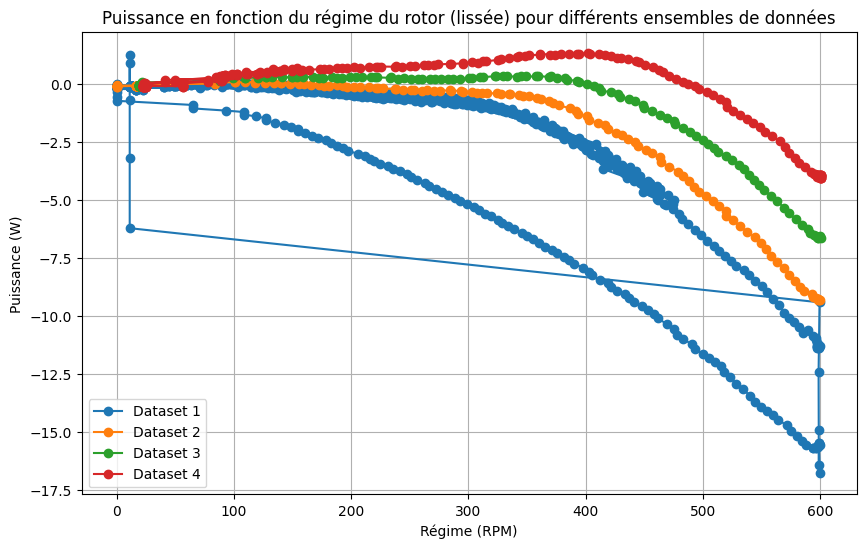

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Création de la figure
plt.figure(figsize=(10, 6))

# Boucle pour tracer chaque DataFrame dans data_list avec lissage
for i, data in enumerate(data_list):
    # Définir une étiquette pour chaque dataset, par exemple "Dataset 1", "Dataset 2", etc.
    label = f"Dataset {i+1}"

    # Conversion en numérique (ignore les erreurs et remplace les valeurs invalides par NaN)
    data["PuissanceMoteur(W)"] = pd.to_numeric(data["PuissanceMoteur(W)"], errors='coerce')
    data["RégimeRotor(rpm)"] = pd.to_numeric(data["RégimeRotor(rpm)"], errors='coerce')
    
    # Supprime les lignes avec des valeurs NaN dans les colonnes nécessaires
    data = data.dropna(subset=["PuissanceMoteur(W)", "RégimeRotor(rpm)"])

    # Sélectionner les colonnes de puissance et de régime (RPM) pour le graphique
    puissance = data["PuissanceMoteur(W)"]
    rpm = data["RégimeRotor(rpm)"]

    # Vérifie si assez de points pour appliquer le filtre de Savitzky-Golay
    if len(puissance) >= 11:
        # Appliquer le filtre de Savitzky-Golay pour lisser la courbe (ordre 3 et fenêtre de 11 points)
        puissance_lissée = savgol_filter(puissance, window_length=11, polyorder=3)
        
        # Tracer la courbe lissée
        plt.plot(rpm, puissance_lissée, marker='o', linestyle='-', label=label)
    else:
        print(f"Dataset {i+1} contient moins de 11 points et ne peut pas être lissé.")

# Personnalisation du graphique
plt.xlabel("Régime (RPM)")
plt.ylabel("Puissance (W)")
plt.title("Puissance en fonction du régime du rotor (lissée) pour différents ensembles de données")
plt.legend()   # Affiche la légende pour différencier chaque courbe
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Création de la figure pour le graphique
plt.figure(figsize=(10, 6))

# Boucle pour traiter chaque DataFrame dans data_list
for i, data in enumerate(data_list):
    # Vérifier que la colonne PuissanceMoteur(W) est au bon format
    data['PuissanceMoteur(W)'] = data['PuissanceMoteur(W)'].str.replace(',', '.', regex=False)  # Remplacer virgules par des points
    data['PuissanceMoteur(W)'] = pd.to_numeric(data['PuissanceMoteur(W)'], errors='coerce')  # Convertir en numérique

    # Sélectionner les colonnes de puissance et de régime (RPM) pour le graphique
    puissance = data["PuissanceMoteur(W)"]  # Colonne de puissance
    rpm = data["RégimeRotor(rpm)"]          # Colonne de régime (en RPM)

    # Appliquer le filtre de Savitzky-Golay pour lisser la courbe
    # (ici avec un polynôme d'ordre 3 et une fenêtre de 11 points)
    puissance_lissée = savgol_filter(puissance, window_length=11, polyorder=3)
    
    # Définir une étiquette pour chaque DataFrame (Dataset 1, Dataset 2, etc.)
    label = f"Dataset {i+1}"

    # Tracer la courbe lissée
    plt.plot(rpm, puissance_lissée, marker='o', linestyle='-', label=label)

# Personnalisation du graphique
plt.xlabel("Régime (RPM)")
plt.ylabel("Puissance (W)")
plt.title("Puissance en fonction du régime du rotor (lissée) pour différents ensembles de données")
plt.legend()   # Affiche la légende pour différencier chaque courbe
plt.grid(True)

# Afficher le graphique
plt.show()


AttributeError: Can only use .str accessor with string values!

<Figure size 1000x600 with 0 Axes>

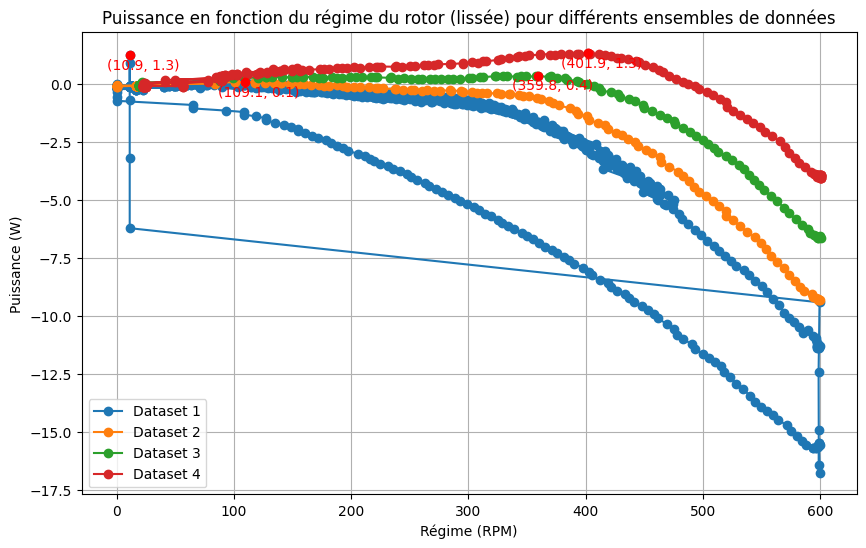

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Création de la figure
plt.figure(figsize=(10, 6))

# Boucle pour tracer chaque DataFrame dans data_list avec lissage et ajout des maximums
for i, data in enumerate(data_list):
    # Définir une étiquette pour chaque dataset, par exemple "Dataset 1", "Dataset 2", etc.
    label = f"Dataset {i+1}"

    # Conversion en numérique (ignore les erreurs et remplace les valeurs invalides par NaN)
    data["PuissanceMoteur(W)"] = pd.to_numeric(data["PuissanceMoteur(W)"], errors='coerce')
    data["RégimeRotor(rpm)"] = pd.to_numeric(data["RégimeRotor(rpm)"], errors='coerce')
    
    # Supprime les lignes avec des valeurs NaN dans les colonnes nécessaires
    data = data.dropna(subset=["PuissanceMoteur(W)", "RégimeRotor(rpm)"])

    # Sélectionner les colonnes de puissance et de régime (RPM) pour le graphique
    puissance = data["PuissanceMoteur(W)"]
    rpm = data["RégimeRotor(rpm)"]

    # Vérifie si assez de points pour appliquer le filtre de Savitzky-Golay
    if len(puissance) >= 11:
        # Appliquer le filtre de Savitzky-Golay pour lisser la courbe (ordre 3 et fenêtre de 11 points)
        puissance_lissée = savgol_filter(puissance, window_length=11, polyorder=3)

        # Trouver l'indice du maximum de la courbe lissée
        max_idx = puissance_lissée.argmax()
        max_rpm = rpm.iloc[max_idx]
        max_puissance = puissance_lissée[max_idx]

        # Tracer la courbe lissée
        plt.plot(rpm, puissance_lissée, marker='o', linestyle='-', label=label)

        # Ajouter le point du maximum
        plt.scatter(max_rpm, max_puissance, color="red", zorder=5)  # Point rouge pour le maximum
        plt.annotate(f"({max_rpm:.1f}, {max_puissance:.1f})", 
                     (max_rpm, max_puissance), 
                     textcoords="offset points", 
                     xytext=(10, -10), 
                     ha='center', color="red")
    else:
        print(f"Dataset {i+1} contient moins de 11 points et ne peut pas être lissé.")

# Personnalisation du graphique
plt.xlabel("Régime (RPM)")
plt.ylabel("Puissance (W)")
plt.title("Puissance en fonction du régime du rotor (lissée) pour différents ensembles de données")
plt.legend()   # Affiche la légende pour différencier chaque courbe
plt.grid(True)
plt.show()
